In [1]:
from os.path import join, dirname
from glob import glob

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import cm, colors, patches, lines

from scipy import optimize, stats
from scipy.stats import ttest_ind

from nilearn import image, plotting, masking
from nilearn.maskers import NiftiLabelsMasker

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

from tqdm import tqdm

import pingouin as pg

In [2]:
# old
df_old = pd.read_csv('./../data/df_rew1_coef.csv')
df_old

,subj,group,run,roi,roi_,beta,nvoxels
0,GA01,no_stim,r01,raPU,aPU,0.518611,135
1,GA01,no_stim,r01,laPU,aPU,0.599993,133
2,GA01,no_stim,r01,lpPU,pPU,0.151185,132
3,GA01,no_stim,r01,rpPU,pPU,0.272298,105
4,GA01,no_stim,r01,laCA,aCA,0.538827,71
...,...,...,...,...,...,...,...
1795,GP67,DLPFC_cTBS,r03,rpPU,pPU,0.018424,105
1796,GP67,DLPFC_cTBS,r03,laCA,aCA,0.016947,71
1797,GP67,DLPFC_cTBS,r03,lpCA,pCA,-0.135706,103
1798,GP67,DLPFC_cTBS,r03,raCA,aCA,-0.021755,66


In [3]:
# new with +5 20Hz participants
df_n50 = pd.read_csv('./../data/df_rew1_coef_GPn50.csv')
df_n50

,subj,group,run,roi,roi_,beta,nvoxels
0,GA01,no_stim,r01,raPU,aPU,0.518611,135
1,GA01,no_stim,r01,laPU,aPU,0.599993,133
2,GA01,no_stim,r01,lpPU,pPU,0.151185,132
3,GA01,no_stim,r01,rpPU,pPU,0.272298,105
4,GA01,no_stim,r01,laCA,aCA,0.538827,71
...,...,...,...,...,...,...,...
1915,GP75,DLPFC_20Hz,r03,rpPU,pPU,0.614432,105
1916,GP75,DLPFC_20Hz,r03,laCA,aCA,0.917109,71
1917,GP75,DLPFC_20Hz,r03,lpCA,pCA,0.538714,103
1918,GP75,DLPFC_20Hz,r03,raCA,aCA,1.086447,66


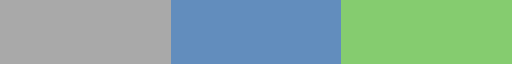

In [4]:
tmp = cm.turbo(np.linspace(0.1,1.0,4))
palette = [colors.rgb2hex(rgb, keep_alpha=False) for rgb in tmp][:3]
#           No-stim    DLPFC     20 Hz
palette = ['#A9A9A9', '#628dbd', '#85cc6f']
colors.ListedColormap(palette)

In [5]:
list_label = [
    'laCA', 'raCA', 'lpCA', 'rpCA',
    'laPU', 'raPU', 'lpPU', 'rpPU'
]

/home/kjh/anaconda3/envs/GP/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.5.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


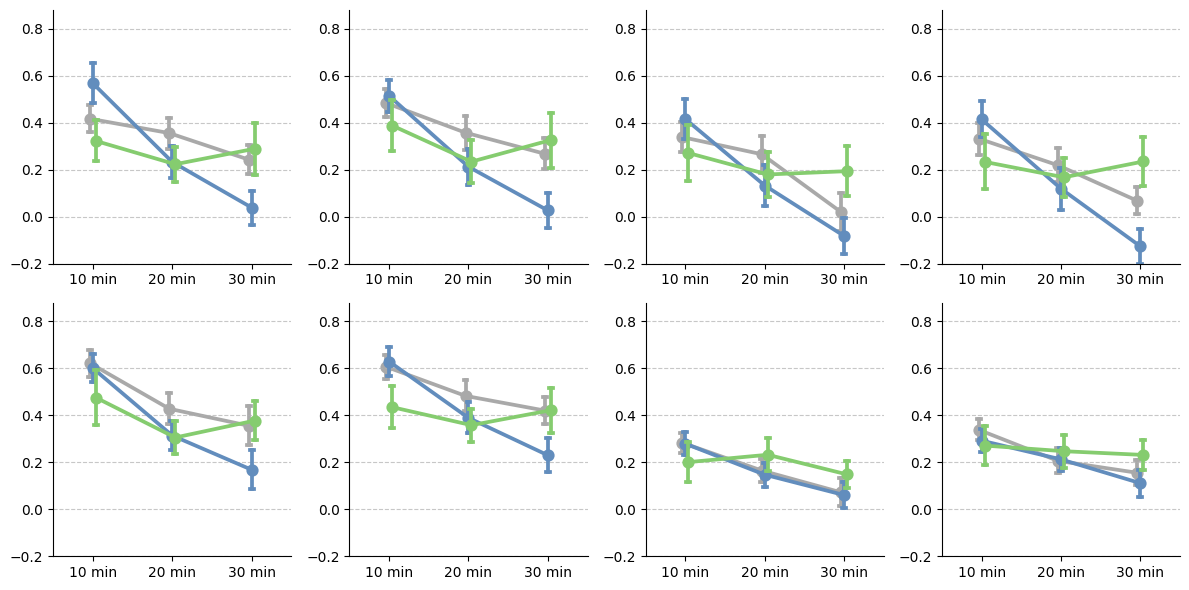

In [6]:
import warnings

# Ignore all future warnings
warnings.filterwarnings('ignore', category=FutureWarning)

order = ['r01','r02','r03']
hue_order = ['no_stim', 'DLPFC_cTBS','DLPFC_20Hz']

ncols=4
nrows=2

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(3*ncols,3*nrows))
axs = np.concatenate(axs)

for ii, roi in enumerate(list_label):
    ax = axs[ii]
    g = sns.pointplot(
        data=df_old[df_old.roi==roi], x='run', y='beta', hue='group',
        order=order, hue_order=hue_order, palette=palette,
        errorbar='se', capsize=0.05,
        dodge=True,
        ax=ax
    )
    ax.set_title(roi)
    ax.set_ylim(-0.2,0.88)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.legend().remove()
    
    ax.set_title(None)
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    
    ax.set_xticklabels(['10 min', '20 min', '30 min'])
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
fig.tight_layout()

# fname = '/home/kjh/Desktop/GP/figures/figS2/figS2_orig.png'
# plt.savefig(fname, dpi=600)
# plt.close()

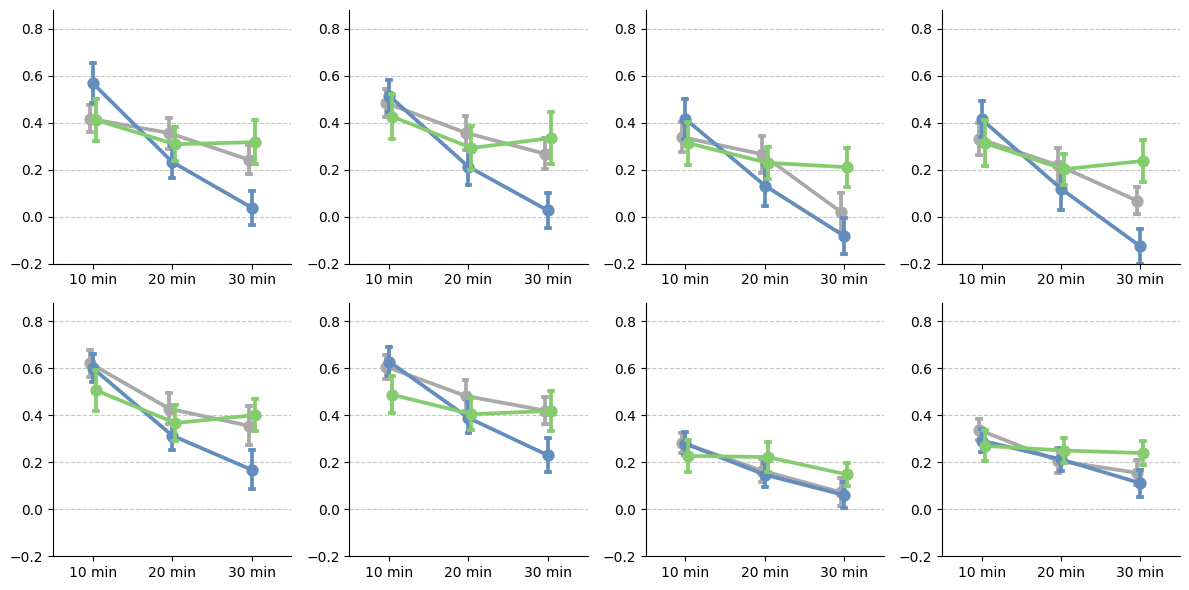

In [7]:
import warnings

# Ignore all future warnings
warnings.filterwarnings('ignore', category=FutureWarning)

order = ['r01','r02','r03']
hue_order = ['no_stim', 'DLPFC_cTBS','DLPFC_20Hz']

ncols=4
nrows=2

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(3*ncols,3*nrows))
axs = np.concatenate(axs)

for ii, roi in enumerate(list_label):
    ax = axs[ii]
    g = sns.pointplot(
        data=df_n50[df_n50.roi==roi], x='run', y='beta', hue='group',
        order=order, hue_order=hue_order, palette=palette,
        errorbar='se', capsize=0.05,
        dodge=True,
        ax=ax
    )
    ax.set_title(roi)
    ax.set_ylim(-0.2,0.88)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.legend().remove()
    
    ax.set_title(None)
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    
    ax.set_xticklabels(['10 min', '20 min', '30 min'])
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
fig.tight_layout()

# fname = '/home/kjh/Desktop/GP/figures/figS2/figS2_orig.png'
# plt.savefig(fname, dpi=600)
# plt.close()

In [12]:
# new with +5 20Hz participants
df_n50_kjh = pd.read_excel('/home/kjh/Desktop/GP/scripts/LME/data/Rew#1_Coef_GPn50_KJH.xlsx')
df_n50_kjh

,subj,group,run,roi,beta,time
0,GA01,baseline,r01,raPU,0.518611,0
1,GA01,baseline,r01,laPU,0.599993,0
2,GA01,baseline,r01,lpPU,0.151185,0
3,GA01,baseline,r01,rpPU,0.272298,0
4,GA01,baseline,r01,laCA,0.538827,0
...,...,...,...,...,...,...
1915,GP75,DLPFC_20Hz,r03,rpPU,0.614432,2
1916,GP75,DLPFC_20Hz,r03,laCA,0.917109,2
1917,GP75,DLPFC_20Hz,r03,lpCA,0.538714,2
1918,GP75,DLPFC_20Hz,r03,raCA,1.086447,2


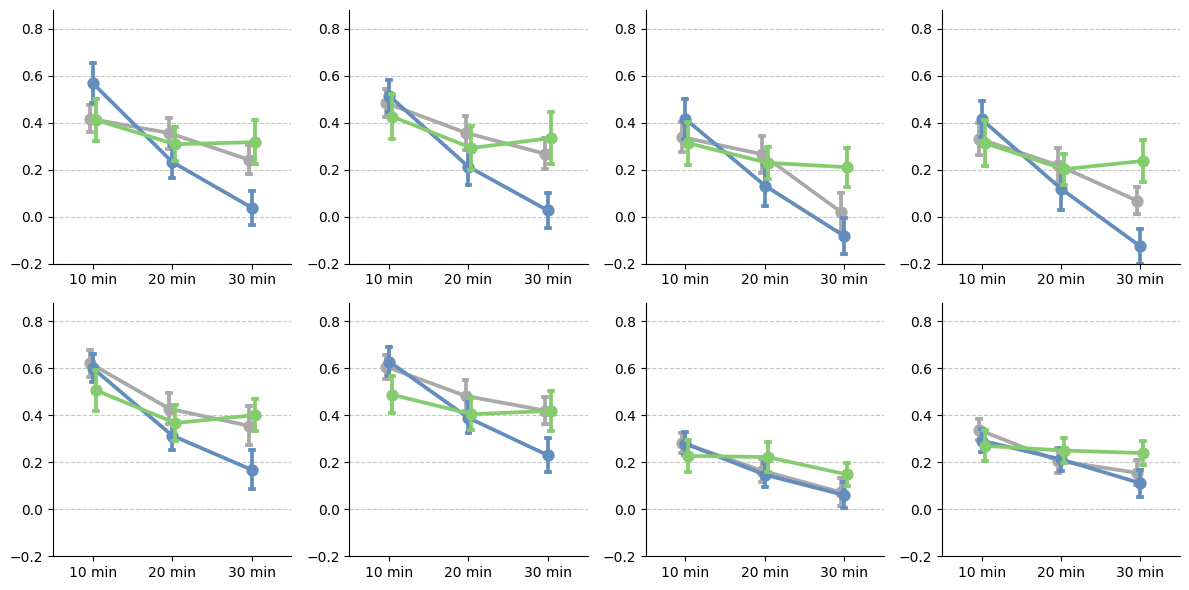

In [13]:
import warnings

# Ignore all future warnings
warnings.filterwarnings('ignore', category=FutureWarning)

order = ['r01','r02','r03']
hue_order = ['no_stim', 'DLPFC_cTBS','DLPFC_20Hz']

ncols=4
nrows=2

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(3*ncols,3*nrows))
axs = np.concatenate(axs)

for ii, roi in enumerate(list_label):
    ax = axs[ii]
    g = sns.pointplot(
        data=df_n50[df_n50_kjh.roi==roi], x='run', y='beta', hue='group',
        order=order, hue_order=hue_order, palette=palette,
        errorbar='se', capsize=0.05,
        dodge=True,
        ax=ax
    )
    ax.set_title(roi)
    ax.set_ylim(-0.2,0.88)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.legend().remove()
    
    ax.set_title(None)
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    
    ax.set_xticklabels(['10 min', '20 min', '30 min'])
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
fig.tight_layout()

# fname = '/home/kjh/Desktop/GP/figures/figS2/figS2_orig.png'
# plt.savefig(fname, dpi=600)
# plt.close()